In [1]:
import  pandas  as  pd
import  numpy as  np                   # For mathematical calculations
import matplotlib.pyplot as plt        # For plotting graphs

In [40]:
bank = pd.read_csv(r'E:\Downloads\bank\bank-full.csv',sep=';')

## Data Visualization

In [41]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


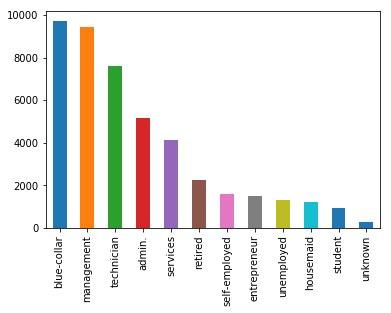

In [13]:
bank['job'].value_counts().plot(kind='bar')

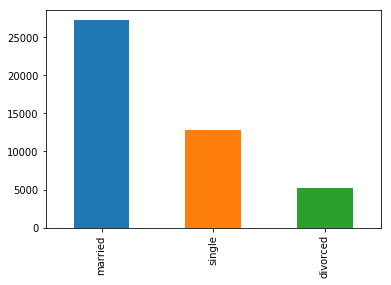

In [14]:
bank['marital'].value_counts().plot(kind='bar')

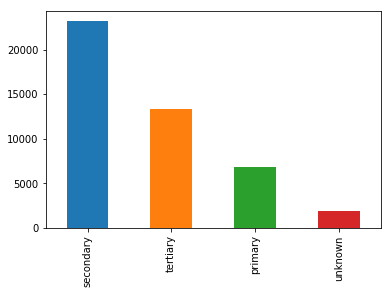

In [15]:
bank['education'].value_counts().plot(kind='bar')

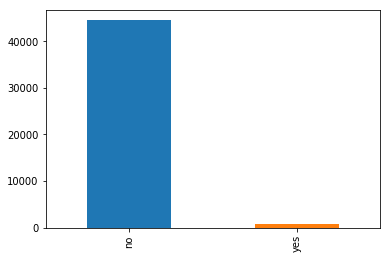

In [16]:
bank['default'].value_counts().plot(kind='bar')

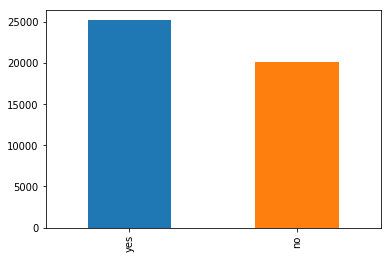

In [17]:
bank['housing'].value_counts().plot(kind='bar')

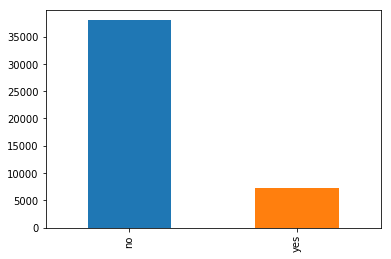

In [18]:
bank['loan'].value_counts().plot(kind='bar')

In [39]:
from sklearn import preprocessing

# Encoding categorical variables.
def encode_features(df_train):
    features = ['job','marital','default','education','housing','loan','contact','month','poutcome']
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_train[feature])
        df_train[feature] = le.transform(df_train[feature])
    return df_train

bank = encode_features(bank)

X = bank.drop(['y'], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, bank['y'], test_size=0.2, random_state=43)

## Logistic Regression

In [38]:
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression
logreg = linear_model.LogisticRegression(penalty = 'l1' ,C=0.5)

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

from sklearn.metrics import confusion_matrix
from  sklearn.metrics import accuracy_score

conf_mat = confusion_matrix(y_pred,y_test)
ac_score = accuracy_score(y_pred,y_test)
print(conf_mat)
print(ac_score)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[7809  829]
 [ 173  232]]
0.8891960632533451
